### Preprocessing

In [121]:
import pandas as pd
import os
from sklearn.utils import shuffle
import re
import numpy as np

In [122]:
text = []
sentiment = []
file_path = "/text/rudra/sentiment_analysis/datasets/aclImdb/train/"
for file in os.listdir(os.path.join(file_path,'neg')):
    path = os.path.join(file_path,'neg',file)
    with open(path) as f:
        text.append(f.readline())
sentiment = [0 for _ in os.listdir(os.path.join(file_path,'neg'))]
len(text), len(sentiment)

(12500, 12500)

In [123]:
for file in os.listdir(os.path.join(file_path,'pos')):
    path = os.path.join(file_path,'pos',file)
    with open(path) as f:
        text.append(f.readline())
pos_sentiment = [1 for _ in os.listdir(os.path.join(file_path,'pos'))]
sentiment.extend(pos_sentiment)


In [124]:
text_test = []
sentiment_test = []
file_path = "/text/rudra/sentiment_analysis/datasets/aclImdb/test/"
for file in os.listdir(os.path.join(file_path,'neg')):
    path = os.path.join(file_path,'neg',file)
    with open(path) as f:
        text_test.append(f.readline())
sentiment_test = [0 for _ in os.listdir(os.path.join(file_path,'neg'))]
print(len(text_test), len(sentiment_test))

for file in os.listdir(os.path.join(file_path,'pos')):
    path = os.path.join(file_path,'pos',file)
    with open(path) as f:
        text_test.append(f.readline())
pos_sentiment = [1 for _ in os.listdir(os.path.join(file_path,'pos'))]
sentiment_test.extend(pos_sentiment)
print(len(text_test), len(sentiment_test))

12500 12500
25000 25000


In [173]:
text_test[:5]

["I gave this a 3 out of a possible 10 stars.<br /><br />Unless you like wasting your time watching an anorexic actress, in this film it's Carly Pope, behaving like a ditz, don't bother.<br /><br />Carly Pope plays Sara Novak, a young college student, who becomes intrigued with a game of riddles, that leads her down into subway tunnels underneath the city - a dangerous thing for even a well-armed man to go in alone.<br /><br />There are various intrigues in the film -- a weirdo classmate who is apparently stalking Sara, a cynical shopkeeper who runs some kind of offbeat hole-in-the-wall establishment that appears to be located in the back alley of a ghetto, a nerdish dim-wit that hangs around the cynic's shop, and a woman named Emily Gray, who is back in prison.<br /><br />Sara's father is a lawyer who is handling Emily Gray's case. <br /><br />A few years back, Emily Gray attempted to drown a 12 year old boy. Emily was put in a mental hospital for 5 years, and for some cockeyed reason

In [179]:
np.unique(sentiment_test[12500:])

array([1])

In [125]:
text.extend(text_test)
sentiment.extend(sentiment_test)
len(text), len(sentiment)

(50000, 50000)

In [126]:
pd.options.display.max_colwidth = 1000
text, sentiment = shuffle(text,sentiment, random_state = 2)
df = pd.DataFrame(list(zip(text,sentiment)), columns=['text','sentiment'])
len(df)

50000

In [134]:
df.head()

,text,sentiment
0,"I had the pleasure of viewing this beautiful film last night, with the wonderful addition of a question and answer session with the director following the viewing. I suspect that the first commenter has never lost a parent or someone very close to them in death. I have had many such losses, and this movie spoke to me. One of the major themes is how we don't deal with questions/issues/stories with our loved ones until it's too late--they're too incapacitated or dead before that happens. Talk to your loved ones, listen to and record their stories, tell people you love them, resolve differences. I loved the message that there are no mistakes. I love the director's portrayal of the relationship of the two daughters--as one of six siblings, it's clear to me he understood how complex those relationships are. His history as a cinematographer also comes through loud and clear--what a beautiful movie! The casting is outstanding--a film not to be missed!",1
1,"It's nice to see Julie Andrews trying a straight dramatic role here--something she hadn't done in awhile--but her character of Judith(wise they didn't try to pass her off as a 'Judy')has the old refined manners and tomboyish hairstyle of yore, and Andrews enacts 'grown-up' as any other actress would interpret frigid. It's a surprisingly bland drama set in Barbados involving Omar Sharif(not the liveliest leading man around--not even in 1974!)hoping to make Andrews a spy while also slowly leading her into the proverbial bedroom. Unmemorable outing does have some camp value: the James Bond-like credits at the beginning are a cheesy hoot. As for Julie: she's quiet and contemplative, but that doesn't do much for the audience, or for the film. Blake Edwards paces the freakin' thing like a funeral. * from ****",0
2,"""STEP BY STEP,"" is my opinion, is a pure ABC hit! I can't recall every episode, but I still enjoyed it. It's hard to say which episode was my favorite. However, I think it was always funny when a mishap occurred at school. I always laugh at that. As a matter of fact, I think just about every single one of J.T. (Brandon Call) and Cody's (Sasha Mitchell) lines were funny. It would have been nice if Penny (Patrika Darbo) had stayed on the show throughout its entire run. Everyone always gave a good performance, the production design was spectacular, the costumes were well-designed, and the writing was always very strong. In conclusion, I hope it never stops airing in syndication.",1
3,"I rented this film yesterday mostly due to the good-looking art and the summary given on the back of the jacket. After popping it into my DVD player I re-examined the jacket cover and even though I took the cover out of from the plastic viewer, I STILL could not read any of the production detail information about the film. This film is entitled Evil on the Jacket and had to locate it by going to Faith Films website to find out any linkage to it here on IMDb.<br /><br />The filming and special affects done in the film looked quite good ... THEN, a line-reading actor spoke. Oh dear ... this actor's reading sounded like some pimple-faced high school jock whose voice just managed to change pitch, and no attempt given to go beyond reading the lines from the script. At first I thought I got a bad disc out of audio sync, then had to surmise it was a foreign film since I couldn't read the jacket... English dialog dubbed. If they'd casted the right person for dubbing the dialog, this film M...",0
4,"Hines and Goforth, the perpetrators of this crime, begin on the wrong foot first step, by assuming that Wells wrote Gothic horror and that all of his lines are meant to be taken seriously. That simply isn't true. Wells was very much an inheritor of the Enlightenment, and his main concern was that Victorian self-satisfaction might leave the British unprepared for the world the new technology could produce - both the good and the bad.<br /><br />Two terrible consequences follow - the protagoni

In [127]:
def preprocess_text(sentence):
    sentence = re.sub('(<)br\s*\/*(>)','',sentence) # Removing <br> as coming in reviews due to html pages
    sentence = re.sub('([?.!])',r' \1 ',sentence) # Putting space between word and punctuation
    sentence = re.sub('[^a-zA-z!.?]+',' ',sentence) # Replacing everythong other that a-zA-z and some punctuation
    sentence = re.sub('(\.\s+)+','. ',sentence)
    sentence = re.sub('(\s+[a-z]\s+)',' ',sentence) # Replacing every single character in between sentence
    sentence = sentence.lower() # lowering all words
    return sentence


In [128]:
processed_text = [preprocess_text(_) for _ in text]

In [129]:
len(processed_text),len(sentiment)

(50000, 50000)

In [182]:
processed_text[:2], sentiment[:2]

(['i had the pleasure of viewing this beautiful film last night with the wonderful addition of question and answer session with the director following the viewing . i suspect that the first commenter has never lost parent or someone very close to them in death . i have had many such losses and this movie spoke to me . one of the major themes is how we don deal with questions issues stories with our loved ones until it too late they re too incapacitated or dead before that happens . talk to your loved ones listen to and record their stories tell people you love them resolve differences . i loved the message that there are no mistakes . i love the director portrayal of the relationship of the two daughters as one of six siblings it clear to me he understood how complex those relationships are . his history as cinematographer also comes through loud and clear what beautiful movie ! the casting is outstanding film not to be missed ! ',
  'it nice to see julie andrews trying straight dramat

## Model training

In [135]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [240]:
max_length = 100
vocab_size = 20000
BATCH_SIZE = 128
EMBEDDING_SIZE = 128
EPOCHS = 10

In [241]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(processed_text)

In [242]:
processed_text_vector = tokenizer.texts_to_sequences(processed_text)
padded_text_vector = tf.keras.preprocessing.sequence.pad_sequences(processed_text_vector,maxlen=max_length, 
                                                                   truncating='post', padding='post')
padded_text_vector.shape

(50000, 100)

In [243]:
train_text, test_text, train_sentiment, test_sentiment = train_test_split(padded_text_vector, sentiment,
                                                                          test_size = 0.1,
                                                                          random_state=1)
len(train_text), len(test_text), len(train_sentiment), len(test_sentiment)

(45000, 5000, 45000, 5000)

In [244]:
text_train, text_val, sentiment_train, sentiment_val = train_test_split(train_text,train_sentiment, test_size=0.2,
                                                                       random_state=2)
len(text_train), len(text_val), len(sentiment_train), len(sentiment_val)

(36000, 9000, 36000, 9000)

In [228]:
256

256

In [246]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=EMBEDDING_SIZE, input_length=max_length))
model.add(tf.keras.layers.CuDNNLSTM(256))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [247]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 100, 128)          2560000   
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 256)               395264    
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 257       
Total params: 2,955,521
Trainable params: 2,955,521
Non-trainable params: 0
_________________________________________________________________


In [248]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [249]:
model.fit(x=text_train,y=sentiment_train, batch_size=BATCH_SIZE, epochs=EPOCHS, 
          validation_data=[text_val,sentiment_val])

/home/admin/anaconda3/envs/rudra/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 36000 samples, validate on 9000 samples
Epoch 1/10
36000/36000 [==============================] - 26s 720us/step - loss: 0.5346 - acc: 0.7201 - val_loss: 0.3790 - val_acc: 0.8386
Epoch 2/10
36000/36000 [==============================] - 24s 680us/step - loss: 0.3064 - acc: 0.8795 - val_loss: 0.3967 - val_acc: 0.8506
Epoch 3/10
36000/36000 [==============================] - 24s 679us/step - loss: 0.2195 - acc: 0.9194 - val_loss: 0.3784 - val_acc: 0.8333
Epoch 4/10
36000/36000 [==============================] - 25s 681us/step - loss: 0.1618 - acc: 0.9440 - val_loss: 0.4209 - val_acc: 0.8223
Epoch 5/10
36000/36000 [==============================] - 24s 680us/step - loss: 0.1148 - acc: 0.9614 - val_loss: 0.5170 - val_acc: 0.8277
Epoch 6/10
36000/36000 [==============================] - 24s 680us/step - loss: 0.0808 - acc: 0.9737 - val_loss: 0.6243 - val_acc: 0.8257
Epoch 7/10
36000/36000 [==============================] - 24s 679us/step - loss: 0.0590 - acc: 0.9820 - val_loss: 0.6

In [250]:
import matplotlib.pyplot as plt

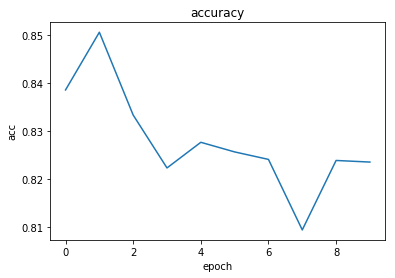

In [256]:
plt.plot(model.history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title("accuracy")
plt.show()

In [257]:
model.evaluate(test_text, test_sentiment)

5000/5000 [==============================] - 1s 282us/step


[0.8654607876777649, 0.8218]

## Evaluation

In [297]:
x = '''I admit, the great majority of films released before say 1933 are just not for me. Of the dozen or so "major" silents I have viewed, one I loved (The Crowd), and two were very good (The Last Command and City Lights, that latter Chaplin circa 1931).<br /><br />So I was apprehensive about this one, and humor is often difficult to appreciate (uh, enjoy) decades later. I did like the lead actors, but thought little of the film.<br /><br />One intriguing sequence. Early on, the guys are supposed to get "de-loused" and for about three minutes, fully dressed, do some schtick. In the background, perhaps three dozen men pass by, all naked, white and black (WWI ?), and for most, their butts, part or full backside, are shown. Was this an early variation of beefcake courtesy of Howard Hughes?'''
x = preprocess_text(x)
x

'i admit the great majority of films released before say are just not for me . of the dozen or so major silents i have viewed one i loved the crowd and two were very good the last command and city lights that latter chaplin circa . so i was apprehensive about this one and humor is often difficult to appreciate uh enjoy decades later . i did like the lead actors but thought little of the film . one intriguing sequence . early on the guys are supposed to get de loused and for about three minutes fully dressed do some schtick . in the background perhaps three dozen men pass by all naked white and black wwi ? and for most their butts part or full backside are shown . was this an early variation of beefcake courtesy of howard hughes ? '

In [298]:
vec = tokenizer.texts_to_sequences([x])
len(vec[0])

132

In [299]:
pad_vec = tf.keras.preprocessing.sequence.pad_sequences(vec, maxlen=max_length, truncating='post', padding='post')
len(pad_vec[0])

100

In [300]:
result = model.predict(pad_vec)
result

array([[0.00085301]], dtype=float32)

In [301]:
result > 0.5

array([[False]])